In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_csv('hospital_data_cleaned.csv')

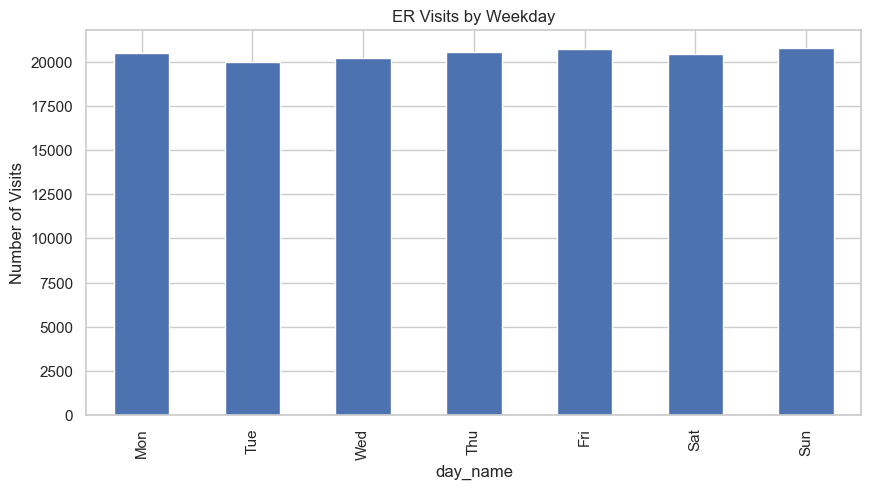

In [53]:
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['ResidentDate_weekday'].map(weekday_map)

weekday_counts = df['day_name'].value_counts().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
weekday_counts.plot(kind='bar')
plt.title('ER Visits by Weekday')
plt.ylabel('Number of Visits')
plt.show()


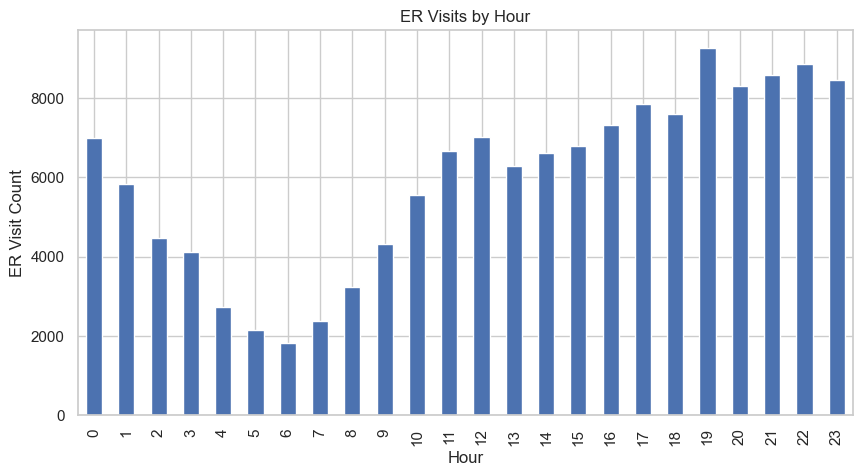

In [54]:
hourly_counts = df['ResidentDate_hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('ER Visit Count')
plt.title('ER Visits by Hour')
plt.show()


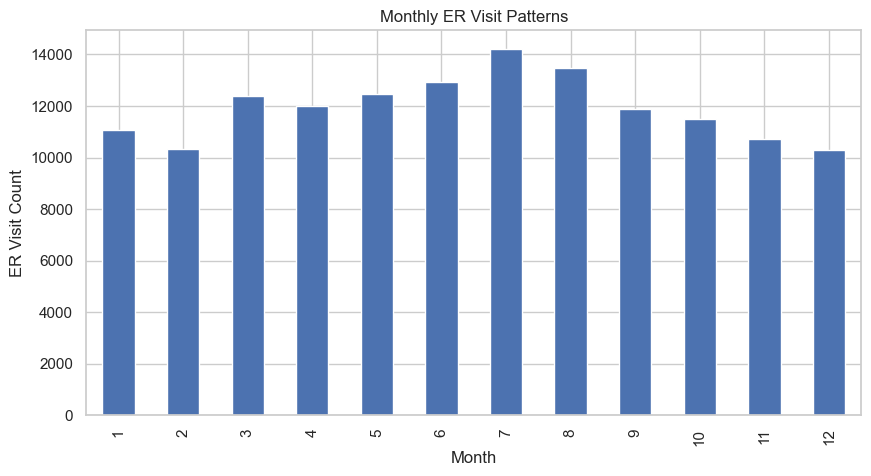

In [55]:
monthly_counts = df['ResidentDate_month'].value_counts().sort_index()
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('ER Visit Count')
plt.title('Monthly ER Visit Patterns')
plt.show()


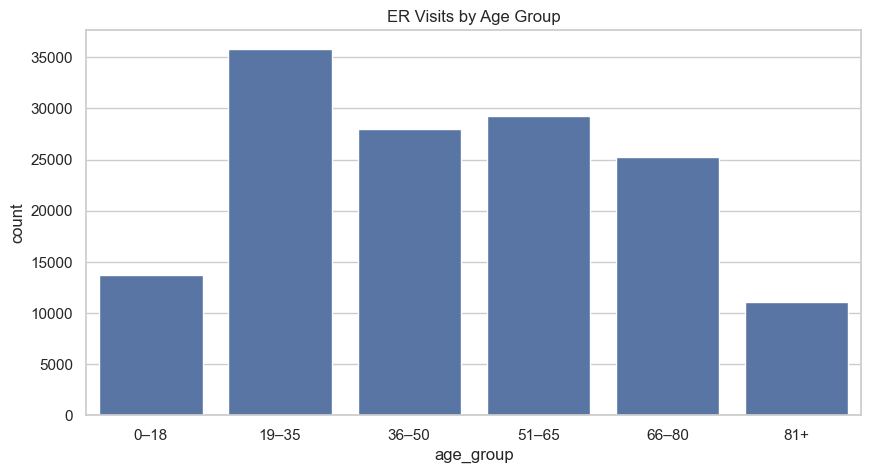

In [56]:
df['age_group'] = pd.cut(df['age'], bins=[0,18,35,50,65,80,100], labels=['0–18','19–35','36–50','51–65','66–80','81+'])
sns.countplot(data=df, x='age_group', order=['0–18','19–35','36–50','51–65','66–80','81+'])
plt.title('ER Visits by Age Group')
plt.show()


In [57]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
Male      89005
Female    54275
Name: count, dtype: int64


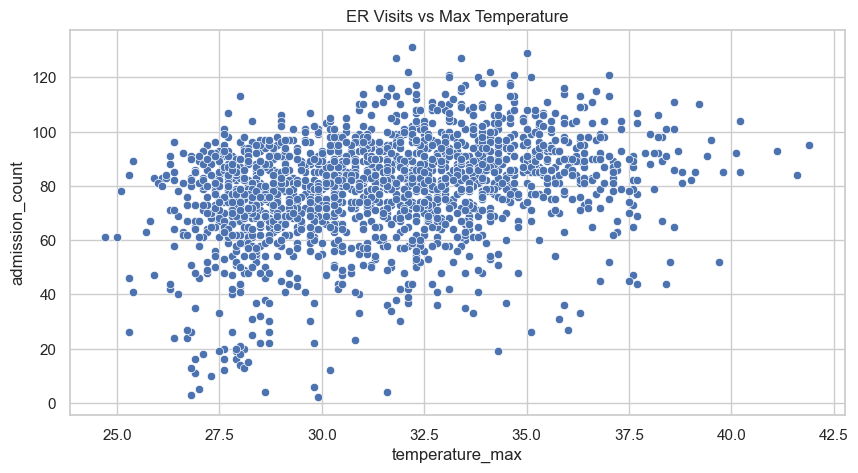

In [58]:
df_daily = df.groupby('ResidentDate').agg({
    'temperature_max': 'mean',
    'ResidentDay': 'count'  # Proxy for visit count
}).rename(columns={'ResidentDay': 'admission_count'})

sns.scatterplot(data=df_daily, x='temperature_max', y='admission_count')
plt.title('ER Visits vs Max Temperature')
plt.show()


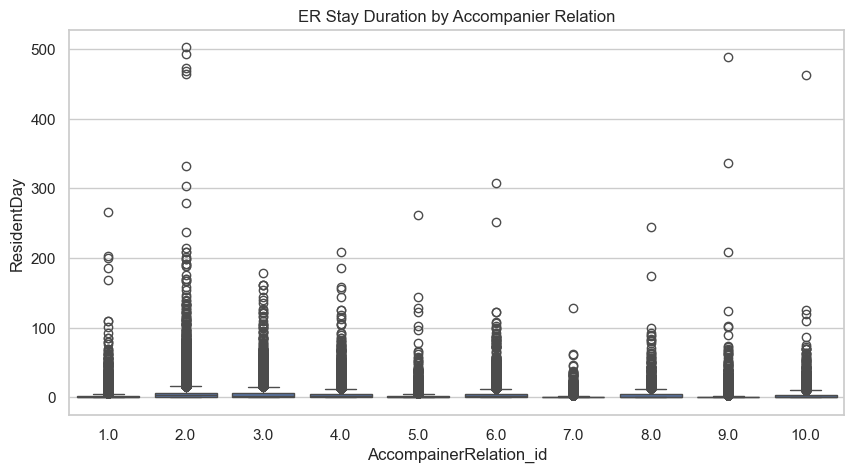

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='AccompainerRelation_id', y='ResidentDay')
plt.title('ER Stay Duration by Accompanier Relation')
plt.show()


In [60]:
df['pandemic'] = df['pandemic'].replace({'None': 'No', np.nan: 'No'})
covid_counts = df.groupby('pandemic').size()
print(covid_counts)


pandemic
Covid_Wave     15996
No            127284
dtype: int64


<Figure size 1000x600 with 0 Axes>

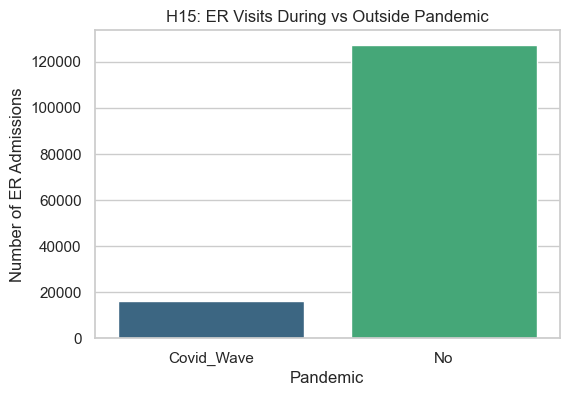

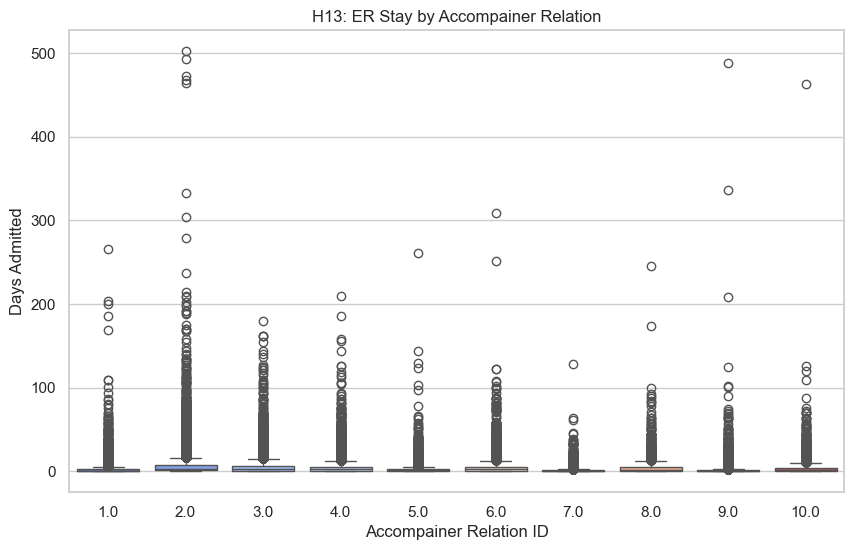

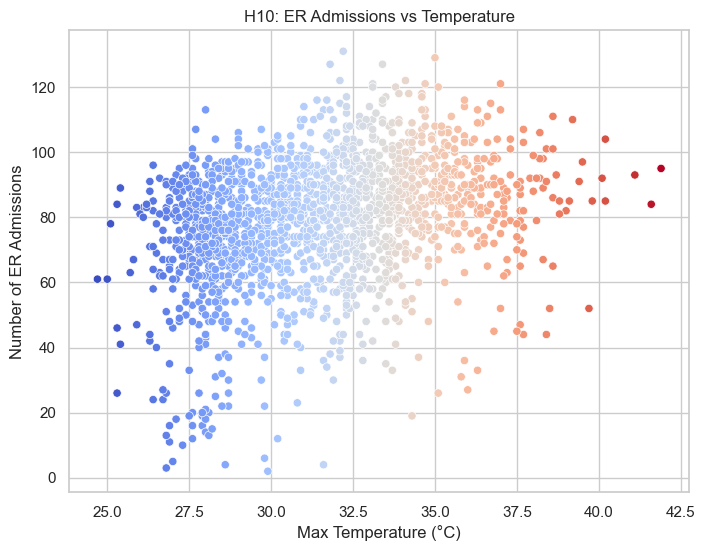

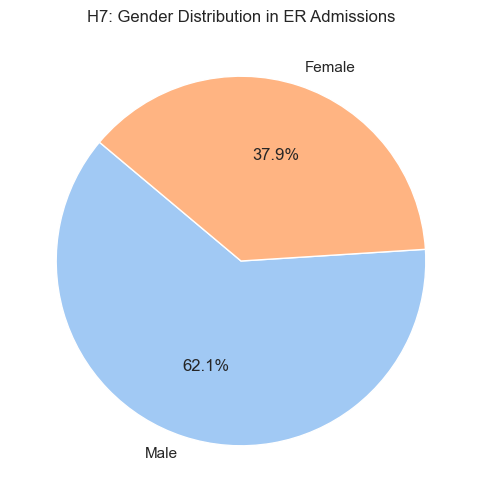

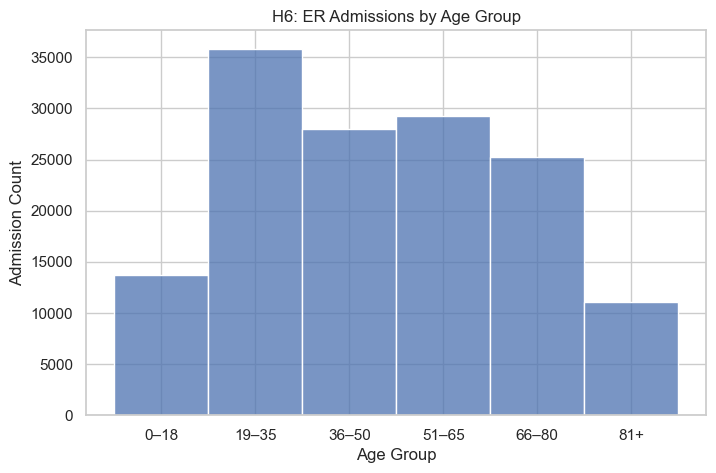

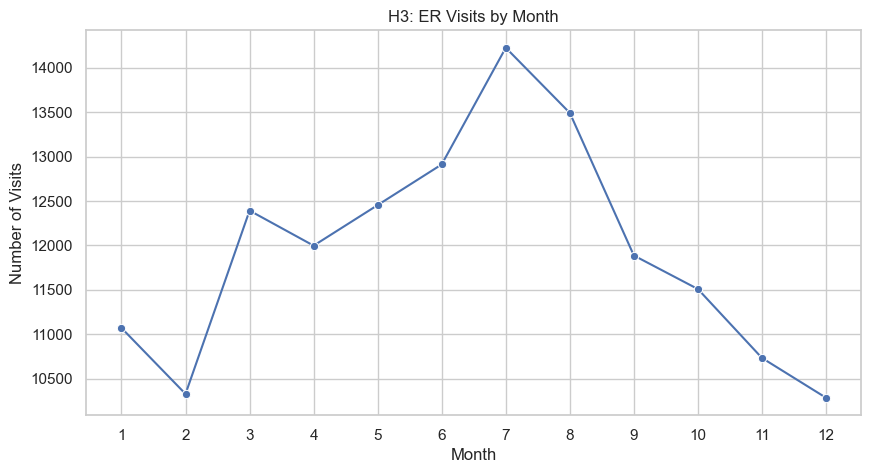

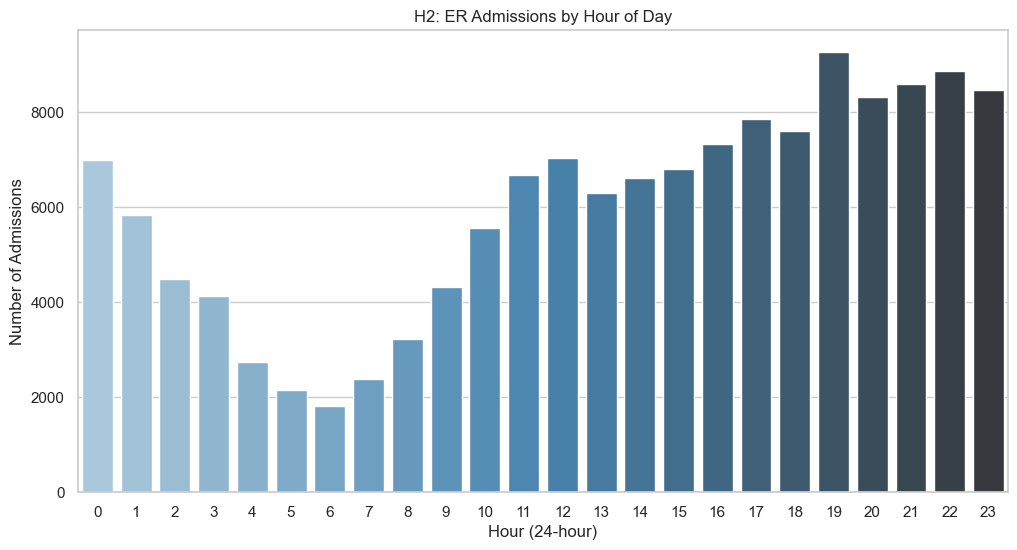

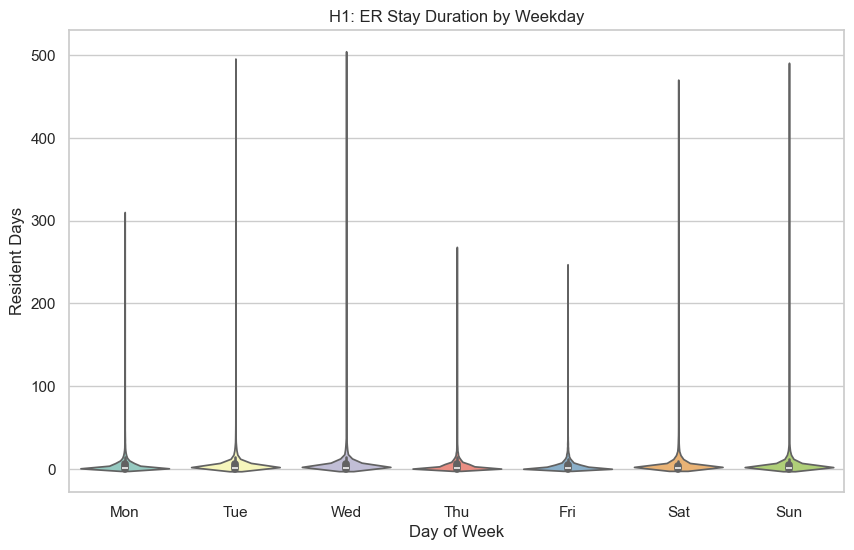

In [61]:


# Ensure visualizations are styled nicely
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# H15: COVID impact on ER admissions - Bar Plot
df['pandemic'] = df['pandemic'].replace({'None': 'No', np.nan: 'No'})
covid_counts = df.groupby('pandemic').size().reset_index(name='counts')

plt.figure(figsize=(6, 4))
sns.barplot(data=covid_counts, x='pandemic', y='counts', palette='viridis')
plt.title('H15: ER Visits During vs Outside Pandemic')
plt.ylabel('Number of ER Admissions')
plt.xlabel('Pandemic')
plt.show()

# H13: Accompainer Relation impact on ER stay - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AccompainerRelation_id', y='ResidentDay', palette='coolwarm')
plt.title('H13: ER Stay by Accompainer Relation')
plt.xlabel('Accompainer Relation ID')
plt.ylabel('Days Admitted')
plt.show()

# H10: Max Temperature vs ER Admissions - Scatter Plot
df_daily = df.groupby('ResidentDate').agg({
    'temperature_max': 'mean',
    'ResidentDay': 'count'
}).rename(columns={'ResidentDay': 'admission_count'}).reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_daily, x='temperature_max', y='admission_count', hue='temperature_max', palette='coolwarm', legend=False)
plt.title('H10: ER Admissions vs Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of ER Admissions')
plt.show()

# H7: Gender impact on ER usage - Pie Chart
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('H7: Gender Distribution in ER Admissions')
plt.show()

# H6: Age group impact - Histogram
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80, 100], labels=['0–18', '19–35', '36–50', '51–65', '66–80', '81+'])

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age_group', stat='count', kde=False, palette='magma')
plt.title('H6: ER Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Admission Count')
plt.show()

# H3: Monthly variation - Line Plot
monthly_counts = df['ResidentDate_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('H3: ER Visits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(range(1, 13))
plt.show()

# H2: Hourly variation - Bar Plot
hourly_counts = df['ResidentDate_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='Blues_d')
plt.title('H2: ER Admissions by Hour of Day')
plt.xlabel('Hour (24-hour)')
plt.ylabel('Number of Admissions')
plt.show()

# H1: Weekday variation - Violin Plot
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['ResidentDate_weekday'].map(weekday_map)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='day_name', y='ResidentDay', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='Set3')
plt.title('H1: ER Stay Duration by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Resident Days')
plt.show()


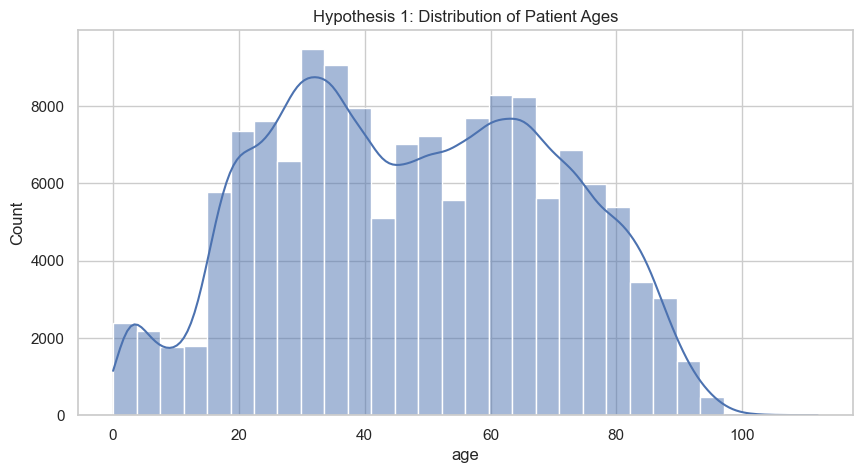

Hypothesis 2: Correlation between ER Admissions and temperature_max: 0.32
Hypothesis 2: Correlation between ER Admissions and temperature_min: 0.24
Hypothesis 2: Correlation between ER Admissions and precipitation: -0.07


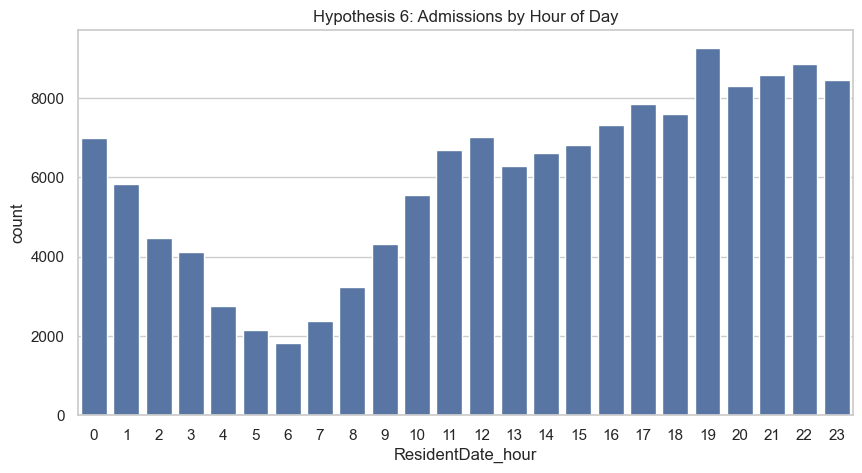

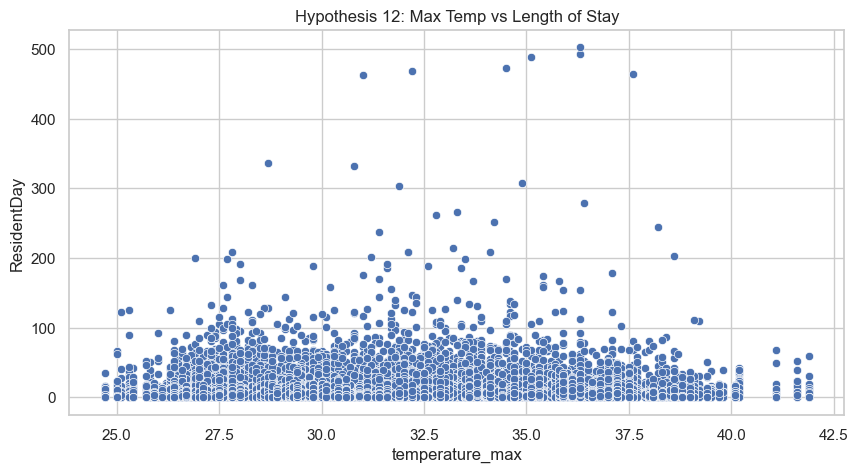

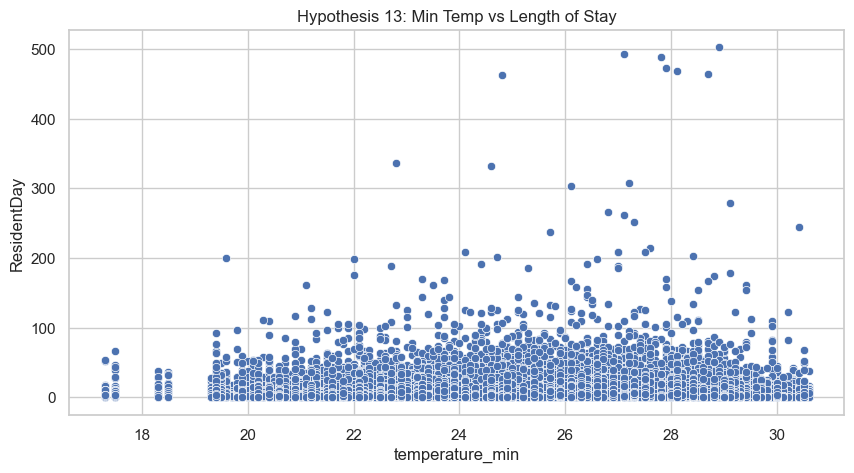

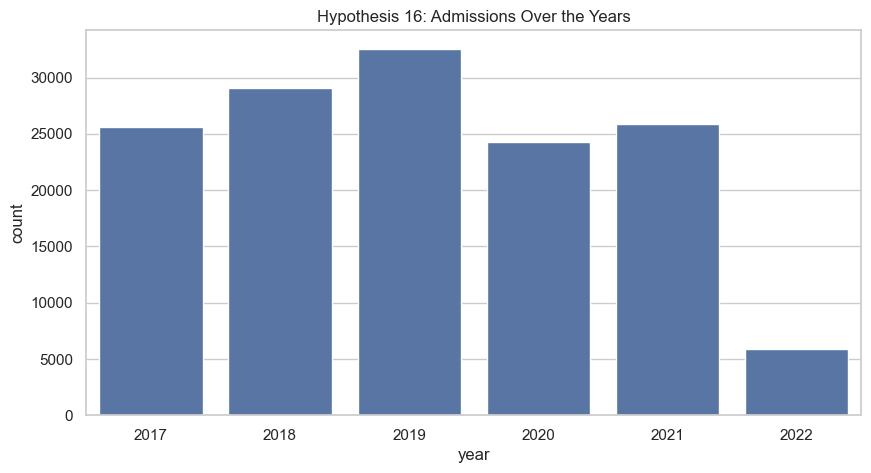

In [62]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import warnings

# Settings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 5)

 # Replace with your actual path

# Convert datetime columns
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Feature engineering
df['day_of_week'] = df['ResidentDate'].dt.dayofweek
df['month'] = df['ResidentDate'].dt.month
df['year'] = df['ResidentDate'].dt.year
df['is_weekend'] = df['day_of_week'].isin([5, 6])
df['disaster_flag'] = df['disaster'].apply(lambda x: 1 if str(x) != 'None' else 0)
df['event_flag'] = df['event_type'].apply(lambda x: 0 if str(x) == "No Event" else 1)

# Fill missing values
df['pandemic'] = df['pandemic'].fillna("None")
df['disaster'] = df['disaster'].fillna("None")

# Daily aggregated admissions
daily_admissions = df.groupby('ResidentDate').size().reset_index(name='ER_Admissions')

# Add weather columns to daily admissions
weather = df[['ResidentDate', 'temperature_max', 'temperature_min', 'precipitation']].drop_duplicates()
daily_admissions = daily_admissions.merge(weather, on='ResidentDate', how='left')

# ==== HYPOTHESIS TESTING ====

# 1. Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Hypothesis 1: Distribution of Patient Ages')
plt.show()

# 2. Correlation between weather and ER admissions
for col in ['temperature_max', 'temperature_min', 'precipitation']:
    corr, _ = pearsonr(daily_admissions['ER_Admissions'], daily_admissions[col])
    print(f"Hypothesis 2: Correlation between ER Admissions and {col}: {corr:.2f}")

# 6. Hour of day
sns.countplot(x='ResidentDate_hour', data=df)
plt.title("Hypothesis 6: Admissions by Hour of Day")
plt.show()


# 12. High temp vs stay
sns.scatterplot(x='temperature_max', y='ResidentDay', data=df)  
plt.title("Hypothesis 12: Max Temp vs Length of Stay")
plt.show()

# 13. Low temp vs stay
sns.scatterplot(x='temperature_min', y='ResidentDay', data=df)
plt.title("Hypothesis 13: Min Temp vs Length of Stay")
plt.show()



# 16. Yearly trend
sns.countplot(x='year', data=df)
plt.title("Hypothesis 16: Admissions Over the Years")
plt.show()



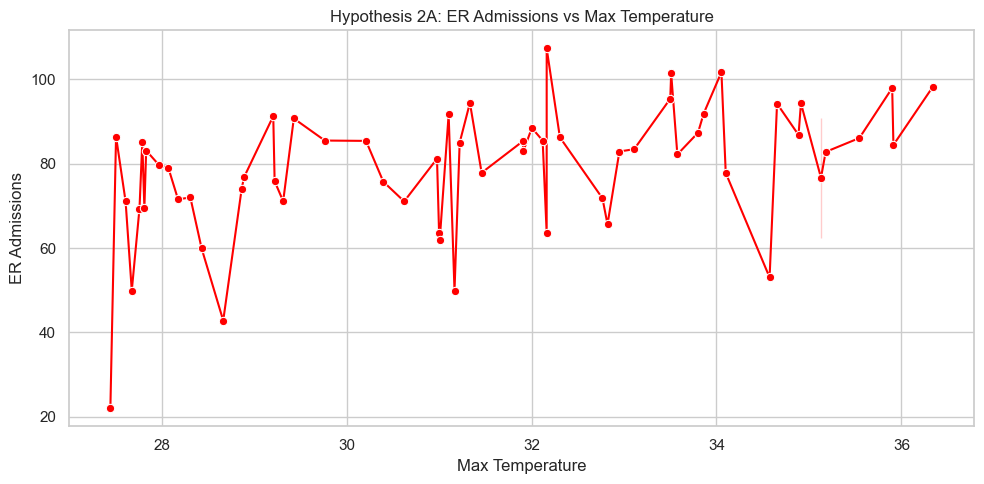

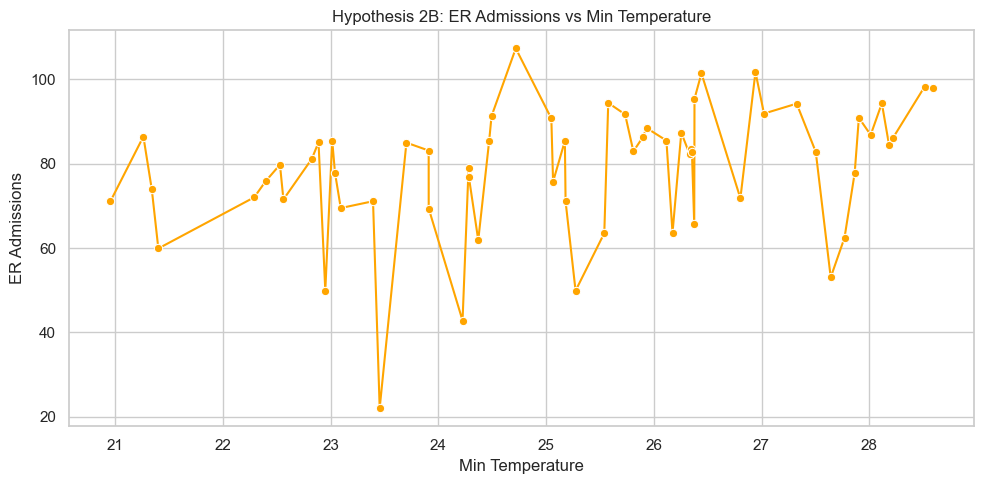

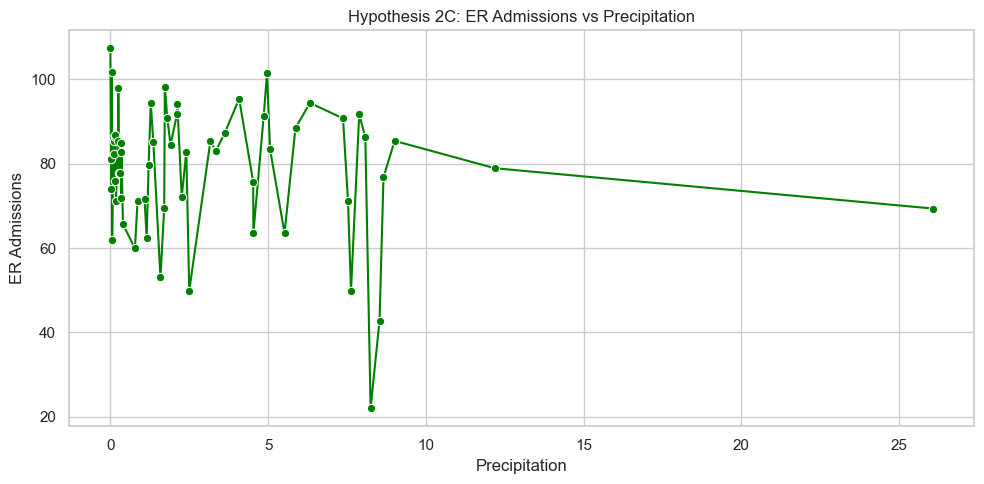

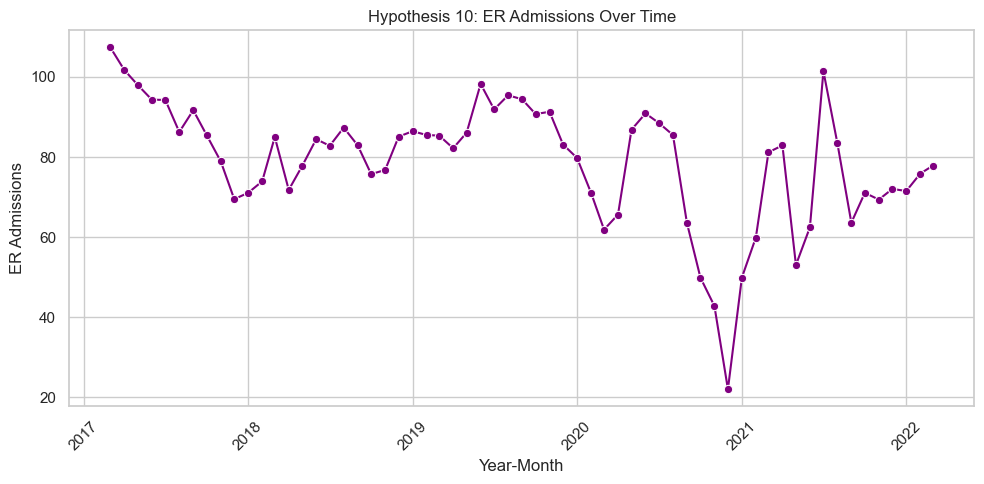

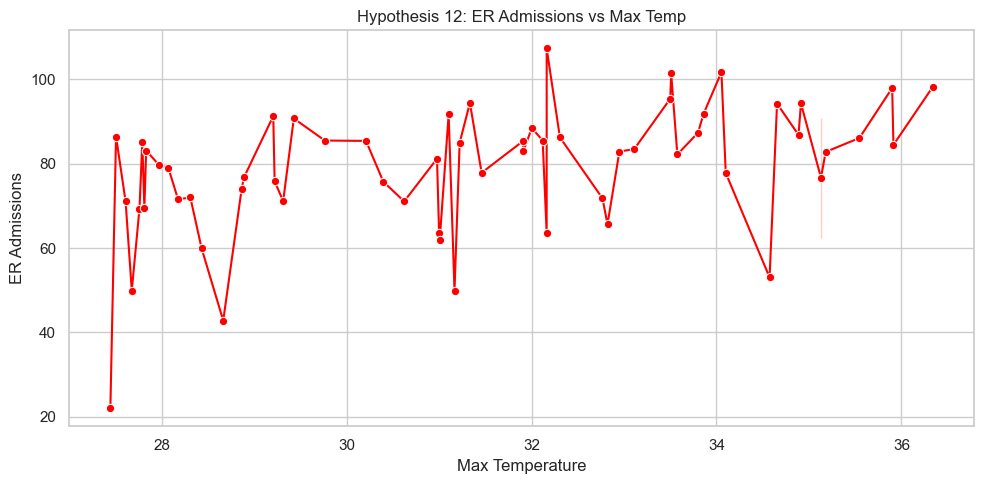

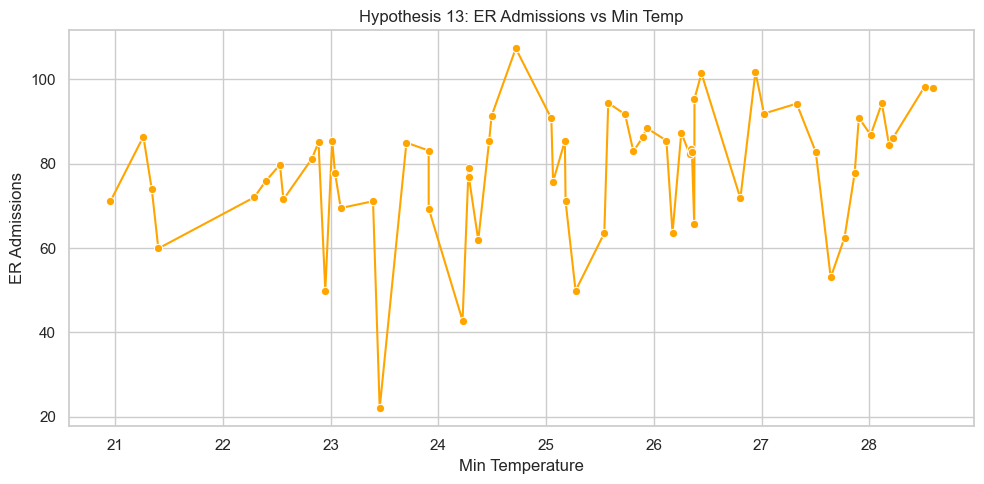

In [63]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare date column for grouping
df['year_month'] = df['ResidentDate'].dt.to_period('M')
daily_admissions['year_month'] = daily_admissions['ResidentDate'].dt.to_period('M')

# Grouping for hypothesis 2 and 10
monthly_admissions = daily_admissions.groupby('year_month').agg({
    'ER_Admissions': 'mean',
    'temperature_max': 'mean',
    'temperature_min': 'mean',
    'precipitation': 'mean'
}).reset_index()
monthly_admissions['year_month'] = monthly_admissions['year_month'].dt.to_timestamp()

# Grouping for hypotheses 12 & 13 (stay vs temp)
monthly_stay = df.groupby('year_month').agg({
    'ResidentDay': 'mean',
    'temperature_max': 'mean',
    'temperature_min': 'mean'
}).reset_index()
monthly_stay['year_month'] = monthly_stay['year_month'].dt.to_timestamp()

# Merge ResidentDay info to admissions
monthly_merged = monthly_admissions.merge(monthly_stay[['year_month', 'ResidentDay']], on='year_month', how='left')

# ==== PLOTS ====

# Hypothesis 2A: ER Admissions vs Max Temperature
sns.lineplot(data=monthly_merged, x='temperature_max', y='ER_Admissions', marker='o', color='red')
plt.title("Hypothesis 2A: ER Admissions vs Max Temperature")
plt.xlabel("Max Temperature")
plt.ylabel("ER Admissions")
plt.tight_layout()
plt.show()

# Hypothesis 2B: ER Admissions vs Min Temperature
sns.lineplot(data=monthly_merged, x='temperature_min', y='ER_Admissions', marker='o', color='orange')
plt.title("Hypothesis 2B: ER Admissions vs Min Temperature")
plt.xlabel("Min Temperature")
plt.ylabel("ER Admissions")
plt.tight_layout()
plt.show()

# Hypothesis 2C: ER Admissions vs Precipitation
sns.lineplot(data=monthly_merged, x='precipitation', y='ER_Admissions', marker='o', color='green')
plt.title("Hypothesis 2C: ER Admissions vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("ER Admissions")
plt.tight_layout()
plt.show()

# Hypothesis 10: Monthly ER Admissions Trend (Time Series)
sns.lineplot(data=monthly_merged, x='year_month', y='ER_Admissions', marker='o', color='purple')
plt.title("Hypothesis 10: ER Admissions Over Time")
plt.xlabel("Year-Month")
plt.ylabel("ER Admissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hypothesis 12: ER Admissions vs Max Temp (Time-based color hue optional)
sns.lineplot(data=monthly_merged, x='temperature_max', y='ER_Admissions', marker='o', color='red')
plt.title("Hypothesis 12: ER Admissions vs Max Temp")
plt.xlabel("Max Temperature")
plt.ylabel("ER Admissions")
plt.tight_layout()
plt.show()

# Hypothesis 13: ER Admissions vs Min Temp
sns.lineplot(data=monthly_merged, x='temperature_min', y='ER_Admissions', marker='o', color='orange')
plt.title("Hypothesis 13: ER Admissions vs Min Temp")
plt.xlabel("Min Temperature")
plt.ylabel("ER Admissions")
plt.tight_layout()
plt.show()


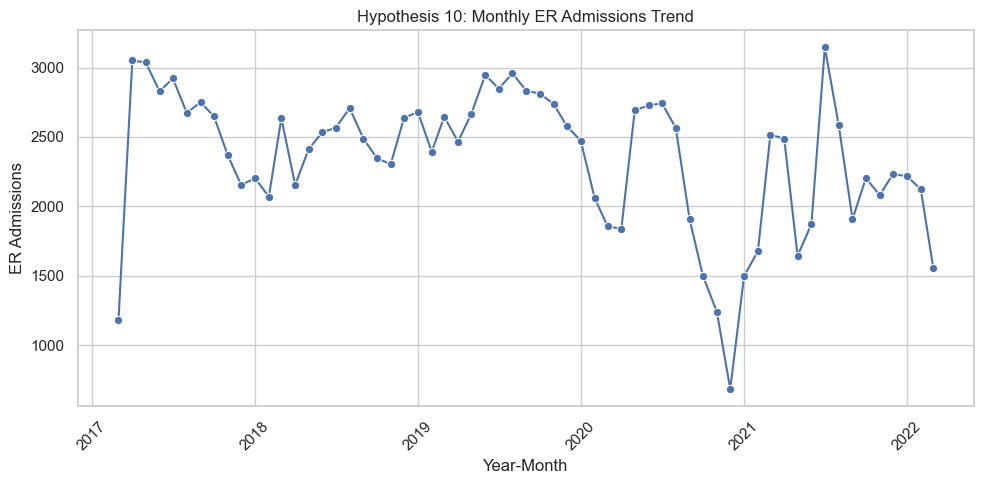

In [64]:
# Monthly ER admissions
monthly_admissions = df.copy()
monthly_admissions['year_month'] = monthly_admissions['ResidentDate'].dt.to_period('M')
monthly_counts = monthly_admissions.groupby('year_month').size().reset_index(name='ER_Admissions')
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

# Plot
sns.lineplot(data=monthly_counts, x='year_month', y='ER_Admissions', marker='o')
plt.title("Hypothesis 10: Monthly ER Admissions Trend")
plt.ylabel("ER Admissions")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
# Hypothesis 12 & 13: Monthly trends
monthly_stay = df.copy()
monthly_stay['year_month'] = monthly_stay['ResidentDate'].dt.to_period('M')
monthly_avg = monthly_stay.groupby('year_month').agg({
    'ResidentDay': 'mean',
    'temperature_max': 'mean',
    'temperature_min': 'mean'
}).reset_index()
monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp()

# Plot
sns.lineplot(data=monthly_avg, x='year_month', y='ResidentDay', label='Avg Length of Stay', color='blue')
sns.lineplot(data=monthly_avg, x='year_month', y='temperature_max', label='Avg Max Temp', color='red')
sns.lineplot(data=monthly_avg, x='year_month', y='temperature_min', label='Avg Min Temp', color='orange')

plt.title("Hypotheses 12 & 13: Length of Stay vs Temperature Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

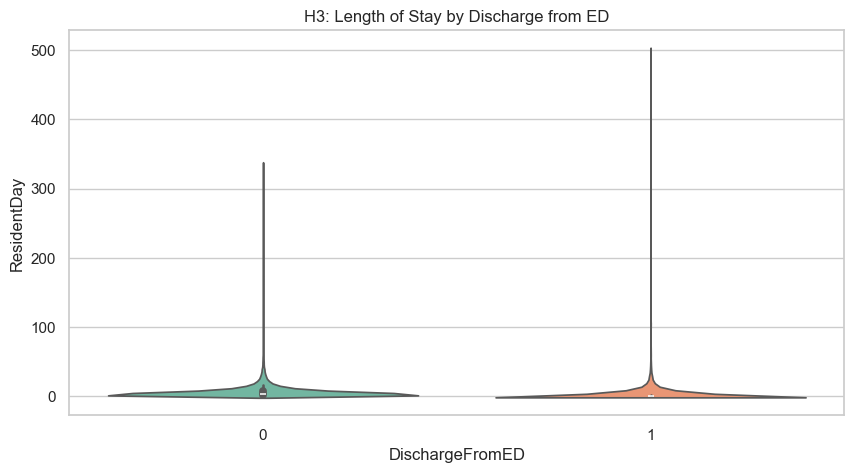

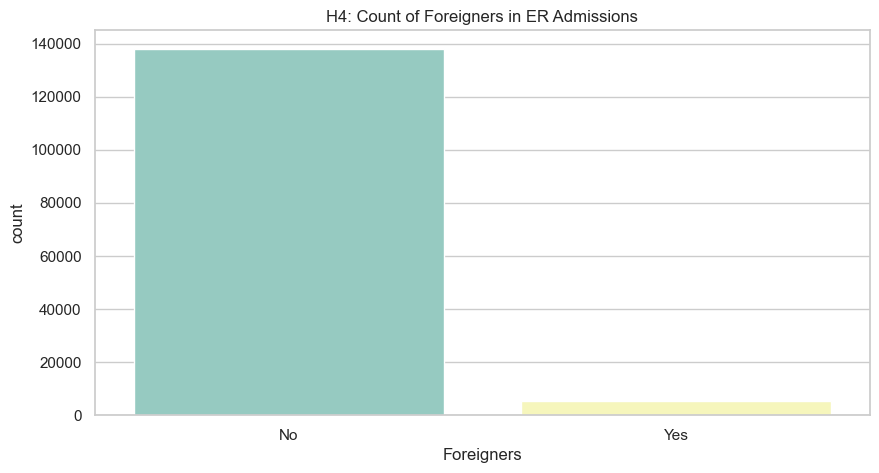

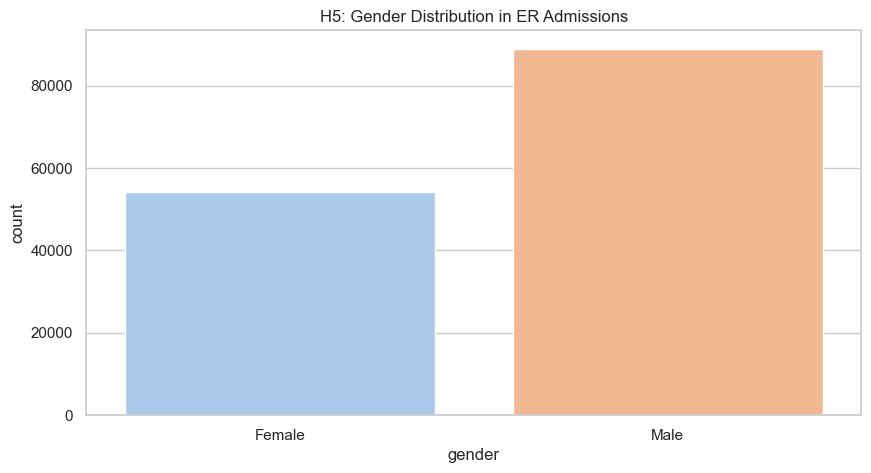

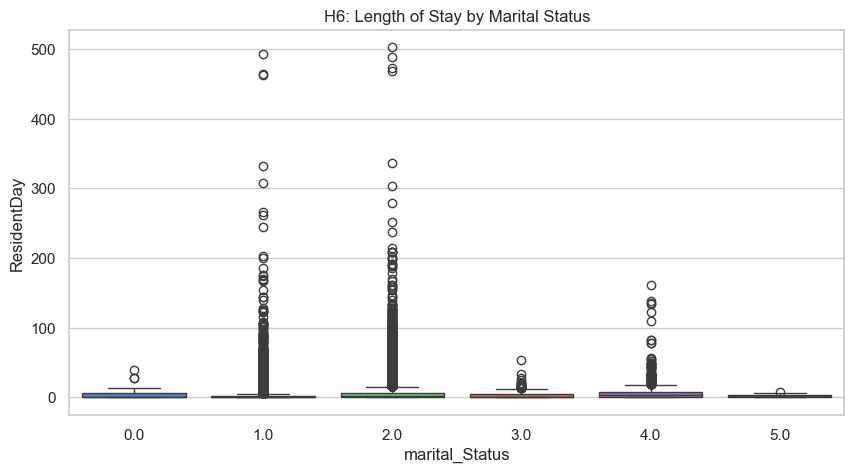

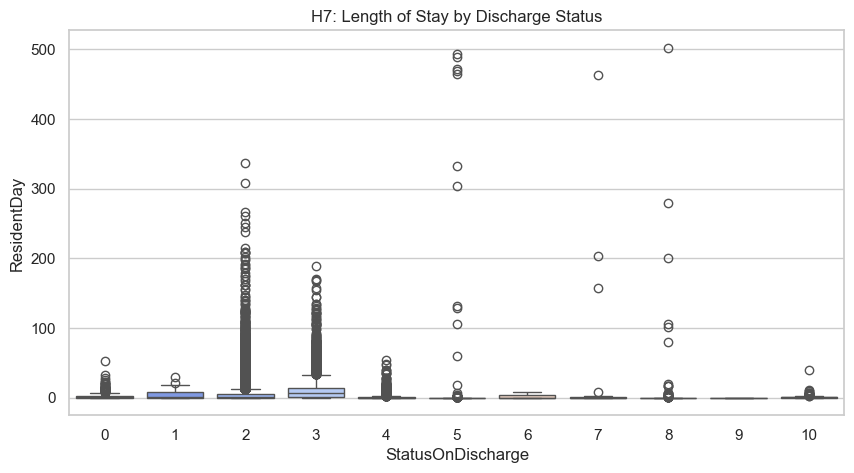

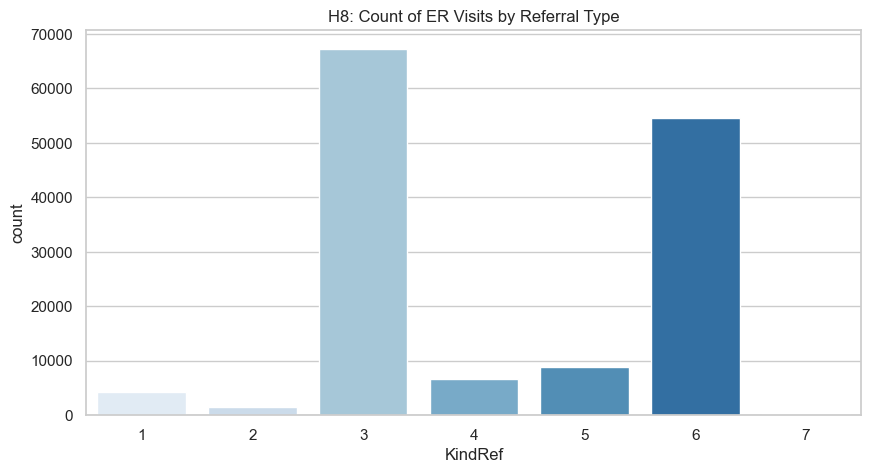

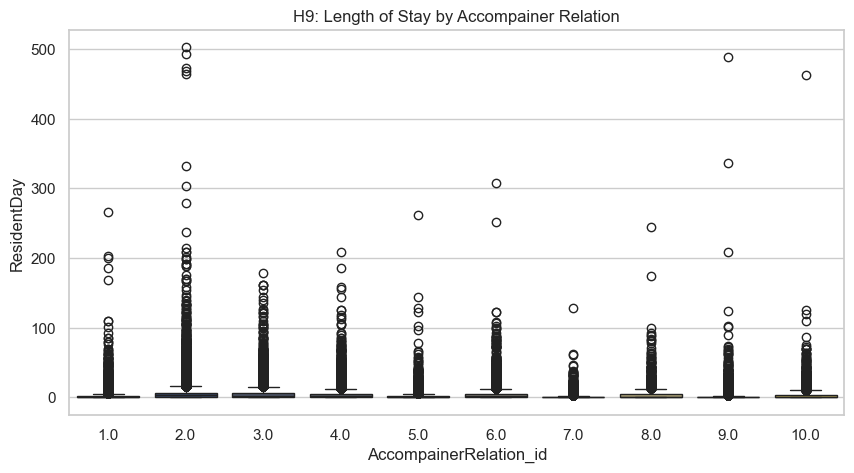

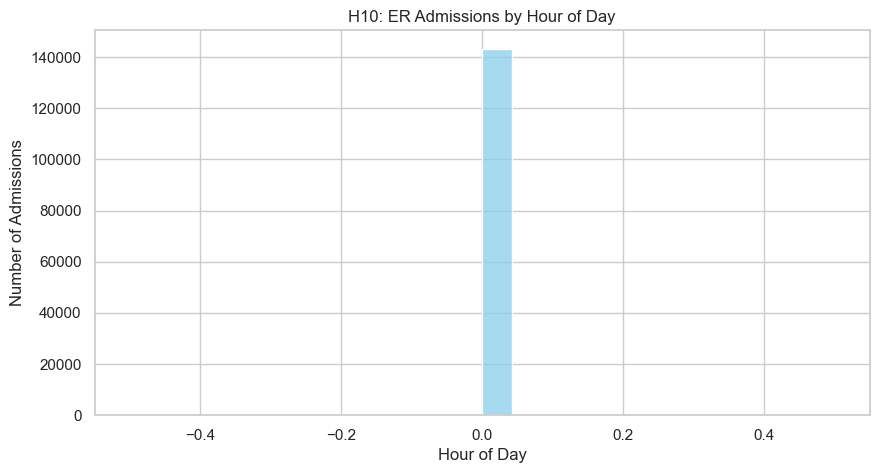

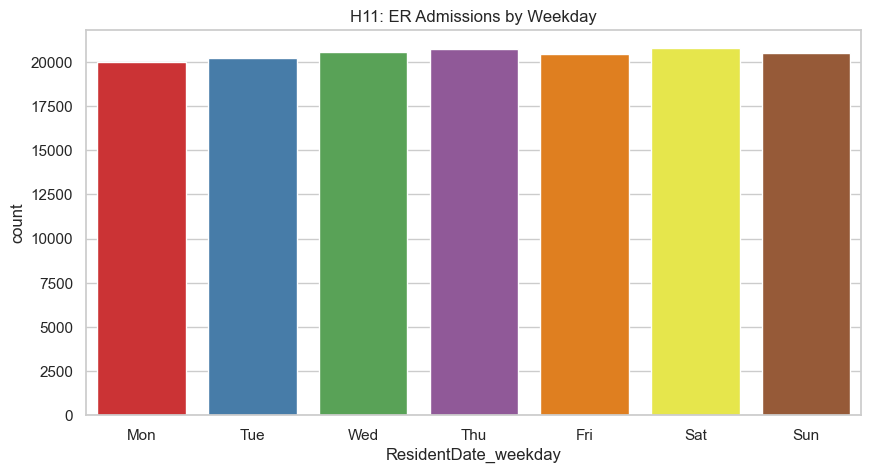

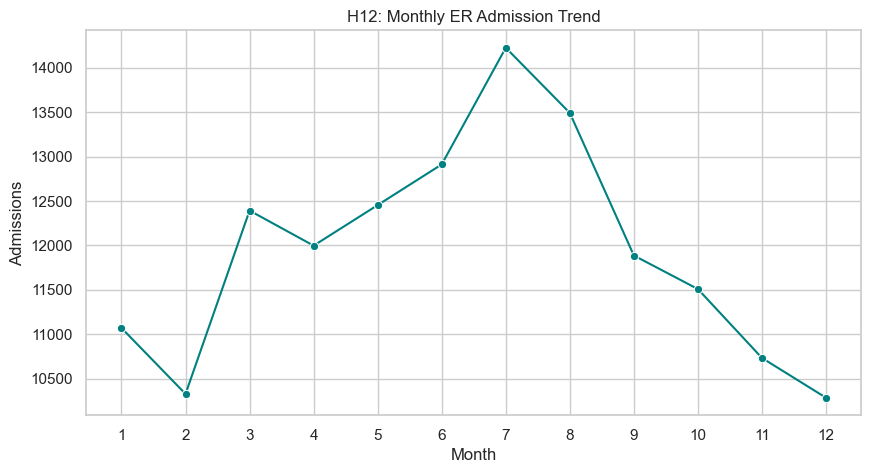

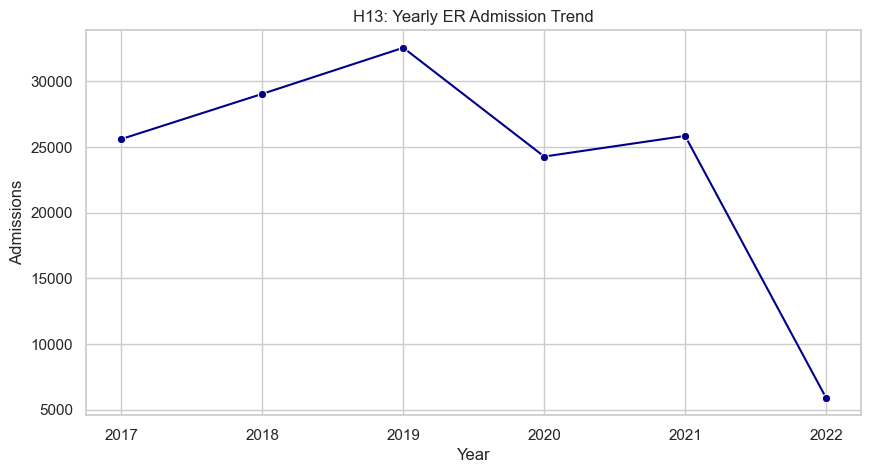

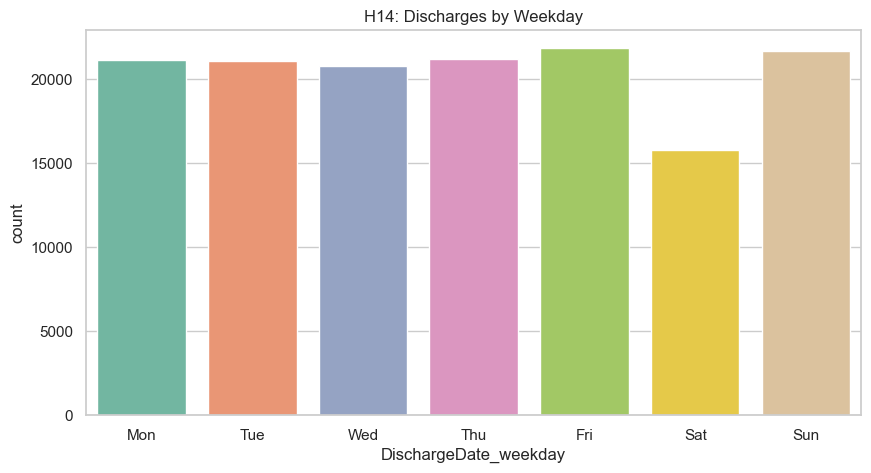

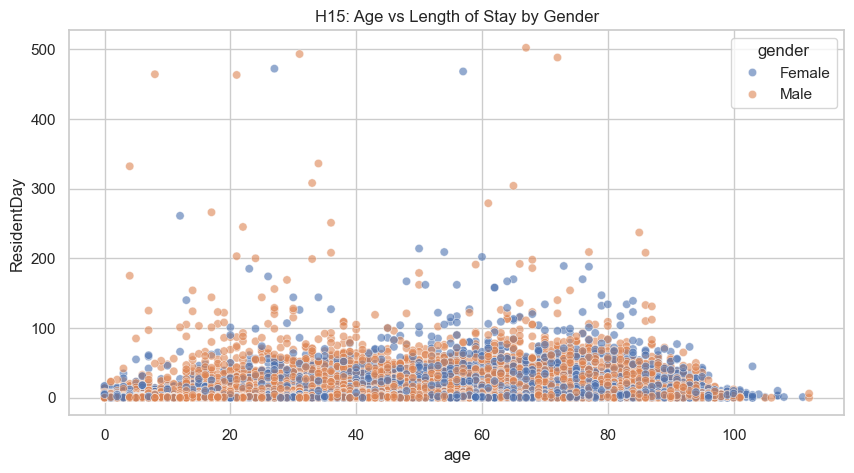

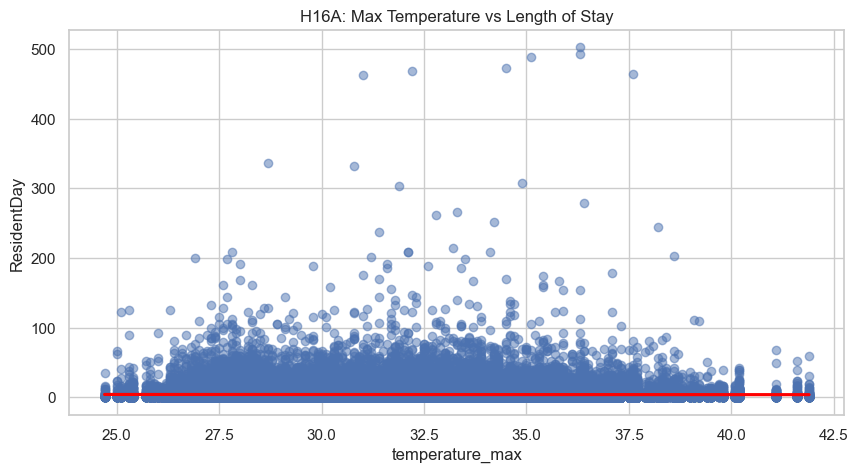

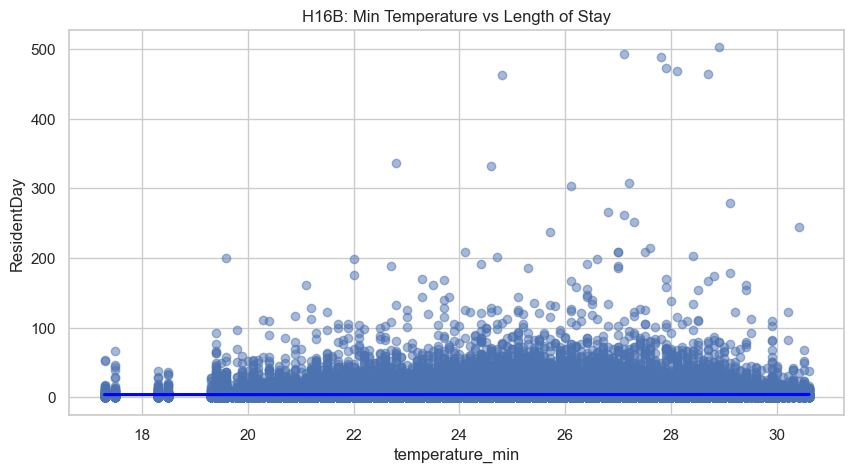

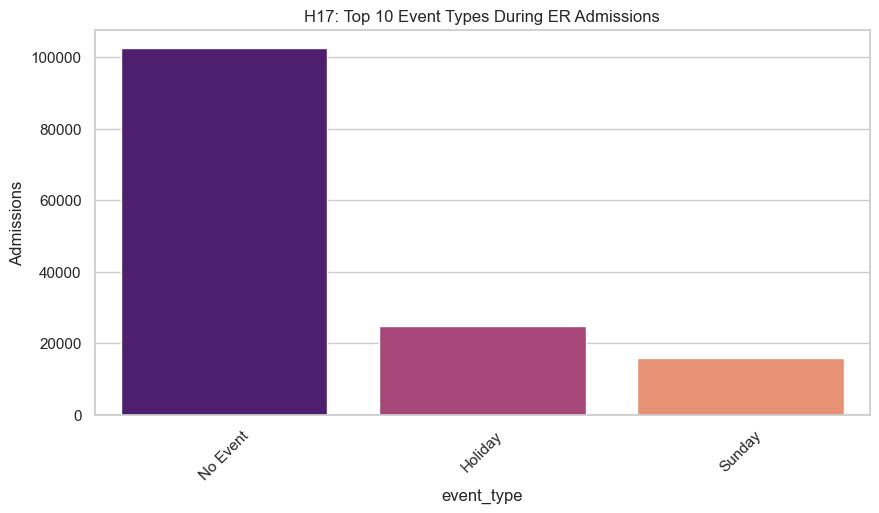

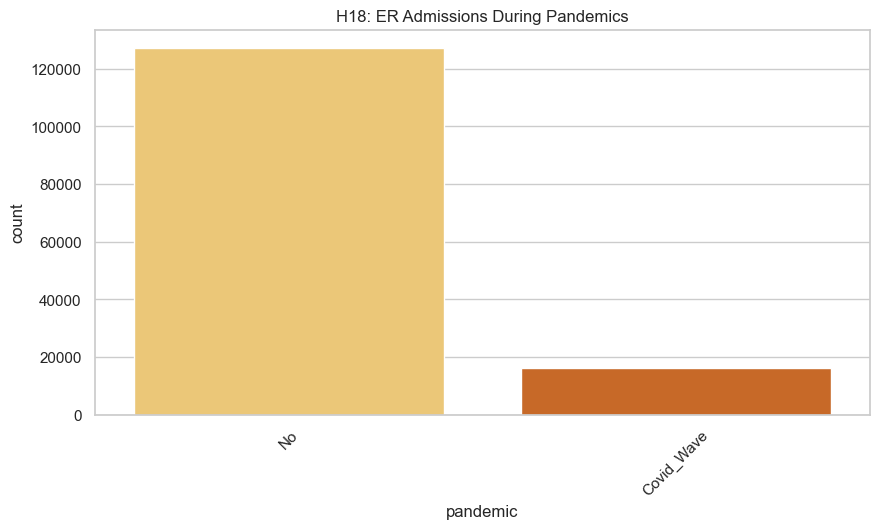

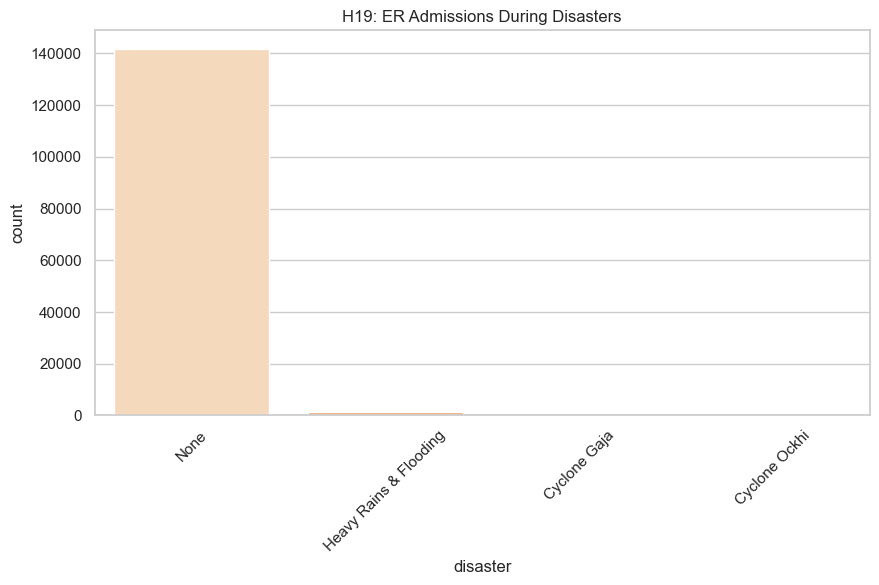

In [69]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Make sure datetime columns are in correct format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])


# Add datetime features if not already
df['ResidentDate_hour'] = df['ResidentDate'].dt.hour
df['ResidentDate_weekday'] = df['ResidentDate'].dt.weekday
df['ResidentDate_month'] = df['ResidentDate'].dt.month
df['ResidentDate_year'] = df['ResidentDate'].dt.year

# ==============================
# HYPOTHESIS VISUALIZATIONS
# ==============================

# H3: Discharge from ED vs Stay Duration
sns.violinplot(x='DischargeFromED', y='ResidentDay', data=df, palette='Set2')
plt.title("H3: Length of Stay by Discharge from ED")
plt.show()

# H4: Foreigners in ER
sns.countplot(x='Foreigners', data=df, palette='Set3')
plt.title("H4: Count of Foreigners in ER Admissions")
plt.show()

# H5: Gender Distribution
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("H5: Gender Distribution in ER Admissions")
plt.show()

# H6: Marital Status vs Stay
sns.boxplot(x='marital_Status', y='ResidentDay', data=df, palette='muted')
plt.title("H6: Length of Stay by Marital Status")
plt.show()

# H7: Status on Discharge vs Stay
sns.boxplot(x='StatusOnDischarge', y='ResidentDay', data=df, palette='coolwarm')
plt.title("H7: Length of Stay by Discharge Status")
plt.show()

# H8: Kind of Referral
sns.countplot(x='KindRef', data=df, palette='Blues')
plt.title("H8: Count of ER Visits by Referral Type")
plt.show()

# H9: Accompainer Relation vs Stay
sns.boxplot(x='AccompainerRelation_id', y='ResidentDay', data=df, palette='cividis')
plt.title("H9: Length of Stay by Accompainer Relation")
plt.show()

# H10: Hour of Day ER Admissions
sns.histplot(df['ResidentDate_hour'], bins=24, kde=False, color='skyblue')
plt.title("H10: ER Admissions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Admissions")
plt.show()

# H11: Weekday ER Admissions
sns.countplot(x='ResidentDate_weekday', data=df, palette='Set1')
plt.title("H11: ER Admissions by Weekday")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# H12: Monthly ER Admissions Trend
monthly = df.groupby('ResidentDate_month').size().reset_index(name='ER_Admissions')
sns.lineplot(x='ResidentDate_month', y='ER_Admissions', data=monthly, marker='o', color='teal')
plt.title("H12: Monthly ER Admission Trend")
plt.xlabel("Month")
plt.ylabel("Admissions")
plt.xticks(ticks=range(1,13))
plt.show()

# H13: Yearly ER Admissions
yearly = df.groupby('ResidentDate_year').size().reset_index(name='ER_Admissions')
sns.lineplot(x='ResidentDate_year', y='ER_Admissions', data=yearly, marker='o', color='darkblue')
plt.title("H13: Yearly ER Admission Trend")
plt.xlabel("Year")
plt.ylabel("Admissions")
plt.show()

# H14: Discharges by Weekday
sns.countplot(x='DischargeDate_weekday', data=df, palette='Set2')
plt.title("H14: Discharges by Weekday")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# H15: Age vs Stay Duration
sns.scatterplot(x='age', y='ResidentDay', data=df, hue='gender', alpha=0.6)
plt.title("H15: Age vs Length of Stay by Gender")
plt.show()

# H16A: Stay Duration vs Max Temp
sns.regplot(x='temperature_max', y='ResidentDay', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("H16A: Max Temperature vs Length of Stay")
plt.show()

# H16B: Stay Duration vs Min Temp
sns.regplot(x='temperature_min', y='ResidentDay', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"blue"})
plt.title("H16B: Min Temperature vs Length of Stay")
plt.show()

# H17: Event Type Distribution
top_events = df['event_type'].value_counts().head(10)
sns.barplot(x=top_events.index, y=top_events.values, palette='magma')
plt.title("H17: Top 10 Event Types During ER Admissions")
plt.xticks(rotation=45)
plt.ylabel("Admissions")
plt.show()

# H18: Pandemic Impact on ER
sns.countplot(x='pandemic', data=df, order=df['pandemic'].value_counts().index, palette='YlOrBr')
plt.title("H18: ER Admissions During Pandemics")
plt.xticks(rotation=45)
plt.show()

# H19: Disaster Impact
sns.countplot(x='disaster', data=df, order=df['disaster'].value_counts().index, palette='Oranges')
plt.title("H19: ER Admissions During Disasters")
plt.xticks(rotation=45)
plt.show()
